**Author**: Lulof Pirée

**Date**: May 2022

--------------------------------------------------------------------------------
Copyright (C) 2022 Lulof Pirée

This file is part of the snakes_spn program.

This program is free software:
you can redistribute it and/or modify it under the terms
of the GNU General Public License as published by the Free Software Foundation,
either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY;
without even the implied warranty of MERCHANTABILITY
or FITNESS FOR A PARTICULAR PURPOSE.
See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.
If not, see <https://www.gnu.org/licenses/>.

--------------------------------------------------------------------------------
## File content
Small investigation in the distribution of amount of attracted
neutrophils under different conditions.
The main question is whether this is approximately normally
distributed between different runs.
In case it is, it would be possible to use the $t$-test
to compare different parameter setters.

In [12]:
import os

from spn_case_study.launch_experiment import (
    setup_init_markings_all_choices, setup_rates_all_choices)
from spn_case_study.run_grid_search import run_experiment
from spn_case_study.petrinet import PLACES, VARS, TRANS, TRANS_TO_PLACES
from spn_tools.run_simulation import plot_results, load_log


# Notebooks usually set the cwd to the directory containing the notebook itself.
print(f"Current directory: {os.getcwd()}")
if "neutrophil_normality.ipynb" in os.listdir(os.getcwd()):
    SAVE_DIR = os.path.join(os.getcwd(), "neutrophil_normality_data")
else:
    raise RuntimeError("Wrong working directory.")

NUM_REPETITIONS = 50
MAX_NUM_TRANSITIONS = 500
MAX_TIME_PASSED = 5

Current directory: /home/nifrec/Vault/Documents/master_1/bio_modelling/model_ass/snakes_spn/spn_case_study


## Run 1: no inhibition.
That is, $[Gr^*] = 0$ at all time.

In [13]:
RUN_1_SAVE_DIR = os.path.join(SAVE_DIR, "unrepressed")
init_markings = {name: (0,) for name in PLACES}
init_markings["neutrophil_free"] = (200,)
init_markings["infl_sig"] = (200,)

rates = {name : "0" for name in TRANS}
rates["recruit_neutrophil"] = f"{VARS['infl_sig']}" 

# Filename of the json gets automatically added by `run_experiment()`,
# but we don't want to run the experiment if the data already exists.
log_filename = os.path.join(RUN_1_SAVE_DIR, "logs.json")
if not os.path.exists(log_filename):
    run_experiment(rates, init_markings, RUN_1_SAVE_DIR, NUM_REPETITIONS, 
                   max_steps=MAX_NUM_TRANSITIONS, max_time=MAX_TIME_PASSED)
else:
    print("Experiment data already present -- loading existing data.")
log = load_log(log_filename)

Starting repeated experiment with 50 repetitions.
Finished repetition 1/50
Finished repetition 2/50
Finished repetition 3/50
Finished repetition 4/50
Finished repetition 5/50
Finished repetition 6/50
Finished repetition 7/50
Finished repetition 8/50
Finished repetition 9/50
Finished repetition 10/50
Finished repetition 11/50
Finished repetition 12/50
Finished repetition 13/50
Finished repetition 14/50
Finished repetition 15/50
Finished repetition 16/50
Finished repetition 17/50
Finished repetition 18/50
Finished repetition 19/50
Finished repetition 20/50
Finished repetition 21/50
Finished repetition 22/50
Finished repetition 23/50
Finished repetition 24/50
Finished repetition 25/50
Finished repetition 26/50
Finished repetition 27/50
Finished repetition 28/50
Finished repetition 29/50
Finished repetition 30/50
Finished repetition 31/50
Finished repetition 32/50
Finished repetition 33/50
Finished repetition 34/50
Finished repetition 35/50
Finished repetition 36/50
Finished repetition 37/

<AxesSubplot:xlabel='time'>

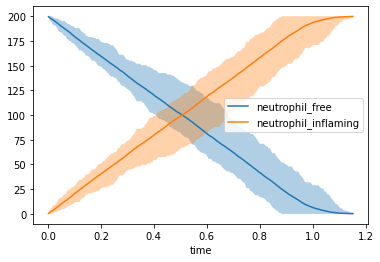

In [14]:
plot_results(log, "time", ["neutrophil_free", "neutrophil_inflaming"], 
             MAX_NUM_TRANSITIONS//2, interval_type="min_max")